## **Student Performance Prediction**
---
This notebook is designed as an educational tool to demonstrate basic machine learning concepts using the UCI Student Performance dataset.
We'll walk through the complete ML pipeline from data loading to model evaluation.
---
# Author - **Bhavya Bhardwaj, Ridhi Singhal**

---
## 1. Setup and Installation
First, let's make sure we have all the required libraries installed. Run the cell below to install any missing packages.

In [1]:
# !pip install pandas numpy matplotlib seaborn scikit-learn

---
## 2. Import Libraries
Now, let's import all the libraries we'll need for this project.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

---
## 3. Load the Dataset
Let's load the Student Performance dataset from the UCI repository.

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip"

import urllib.request
import zipfile
import io

print("Downloading dataset...")
response = urllib.request.urlopen(url)
zip_file = zipfile.ZipFile(io.BytesIO(response.read()))

zip_file.extractall("student_data")
print("Dataset extracted successfully!")

student_data = pd.read_csv("student_data/student-mat.csv", sep=";")
print("Student dataset shape:", student_data.shape)

Dataset extracted successfully!
Student dataset shape: (395, 33)


In [4]:
print("\nFirst 5 rows of the math dataset:")
student_data.head()


First 5 rows of the math dataset:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


---
## 4. Data Understanding
Let's explore the dataset to understand what we're working with.

In [5]:
print("=== DATASET INFORMATION ===")
print(f"Number of students: {student_data.shape[0]}")
print(f"Number of features: {student_data.shape[1] - 3}")  # excluding G1, G2, G3
print(f"Target variables: G1, G2, G3 (grades)")

=== DATASET INFORMATION ===
Number of students: 395
Number of features: 30
Target variables: G1, G2, G3 (grades)


In [6]:
print("\n=== MISSING VALUES ===")
missing_values = student_data.isnull().sum()
print(missing_values[missing_values > 0])


=== MISSING VALUES ===
Series([], dtype: int64)


In [7]:
print("\n=== DATASET STATISTICS ===")
student_data.describe()


=== DATASET STATISTICS ===


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


---
## 5. Data Cleaning
Let's prepare the data for analysis and modeling.

In [8]:
categorical_cols = student_data.select_dtypes(include=['object']).columns
print("Categorical columns:", list(categorical_cols))

Categorical columns: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [9]:
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    student_data[col] = le.fit_transform(student_data[col])
    label_encoders[col] = le

print("Categorical variables encoded successfully!")

Categorical variables encoded successfully!


In [10]:
student_data['pass'] = (student_data['G3'] >= 10).astype(int) #Assuming 10 is passing marks out of 20.

In [11]:
print("\n=== PASS/FAIL DISTRIBUTION ===")
print(student_data['pass'].value_counts())
print(f"Pass rate: {student_data['pass'].mean():.2%}")


=== PASS/FAIL DISTRIBUTION ===
pass
1    265
0    130
Name: count, dtype: int64
Pass rate: 67.09%


---
## 6. Exploratory Data Analysis (EDA)
Now let's explore the data through visualizations to understand patterns and relationships.

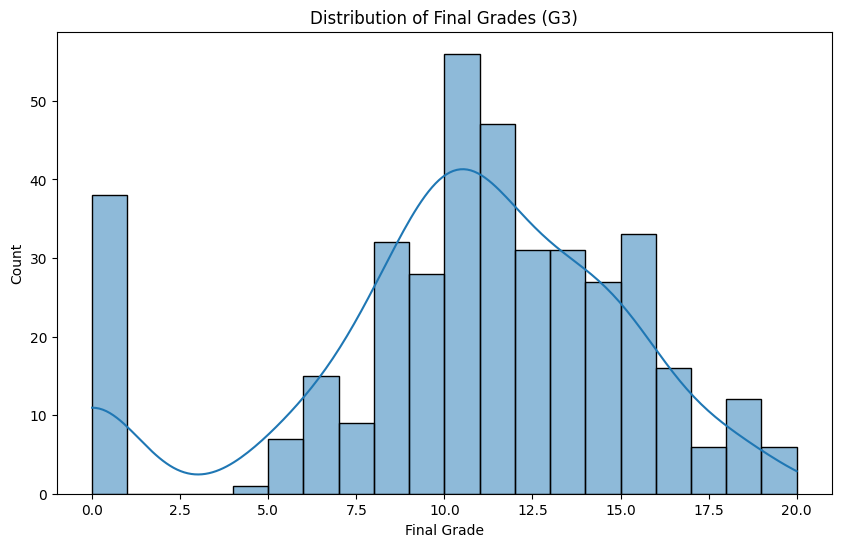

In [12]:
# Distribution of the final grade (G3)
plt.figure(figsize=(10, 6))
sns.histplot(student_data['G3'], kde=True, bins=20)
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade')
plt.ylabel('Count')
plt.show()

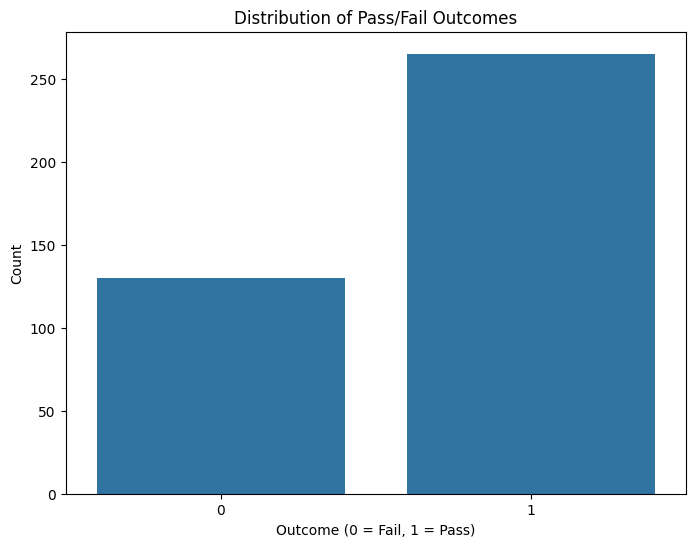

In [13]:
# Distribution of the pass/fail variable
plt.figure(figsize=(8, 6))
sns.countplot(x='pass', data=student_data)
plt.title('Distribution of Pass/Fail Outcomes')
plt.xlabel('Outcome (0 = Fail, 1 = Pass)')
plt.ylabel('Count')
plt.show()

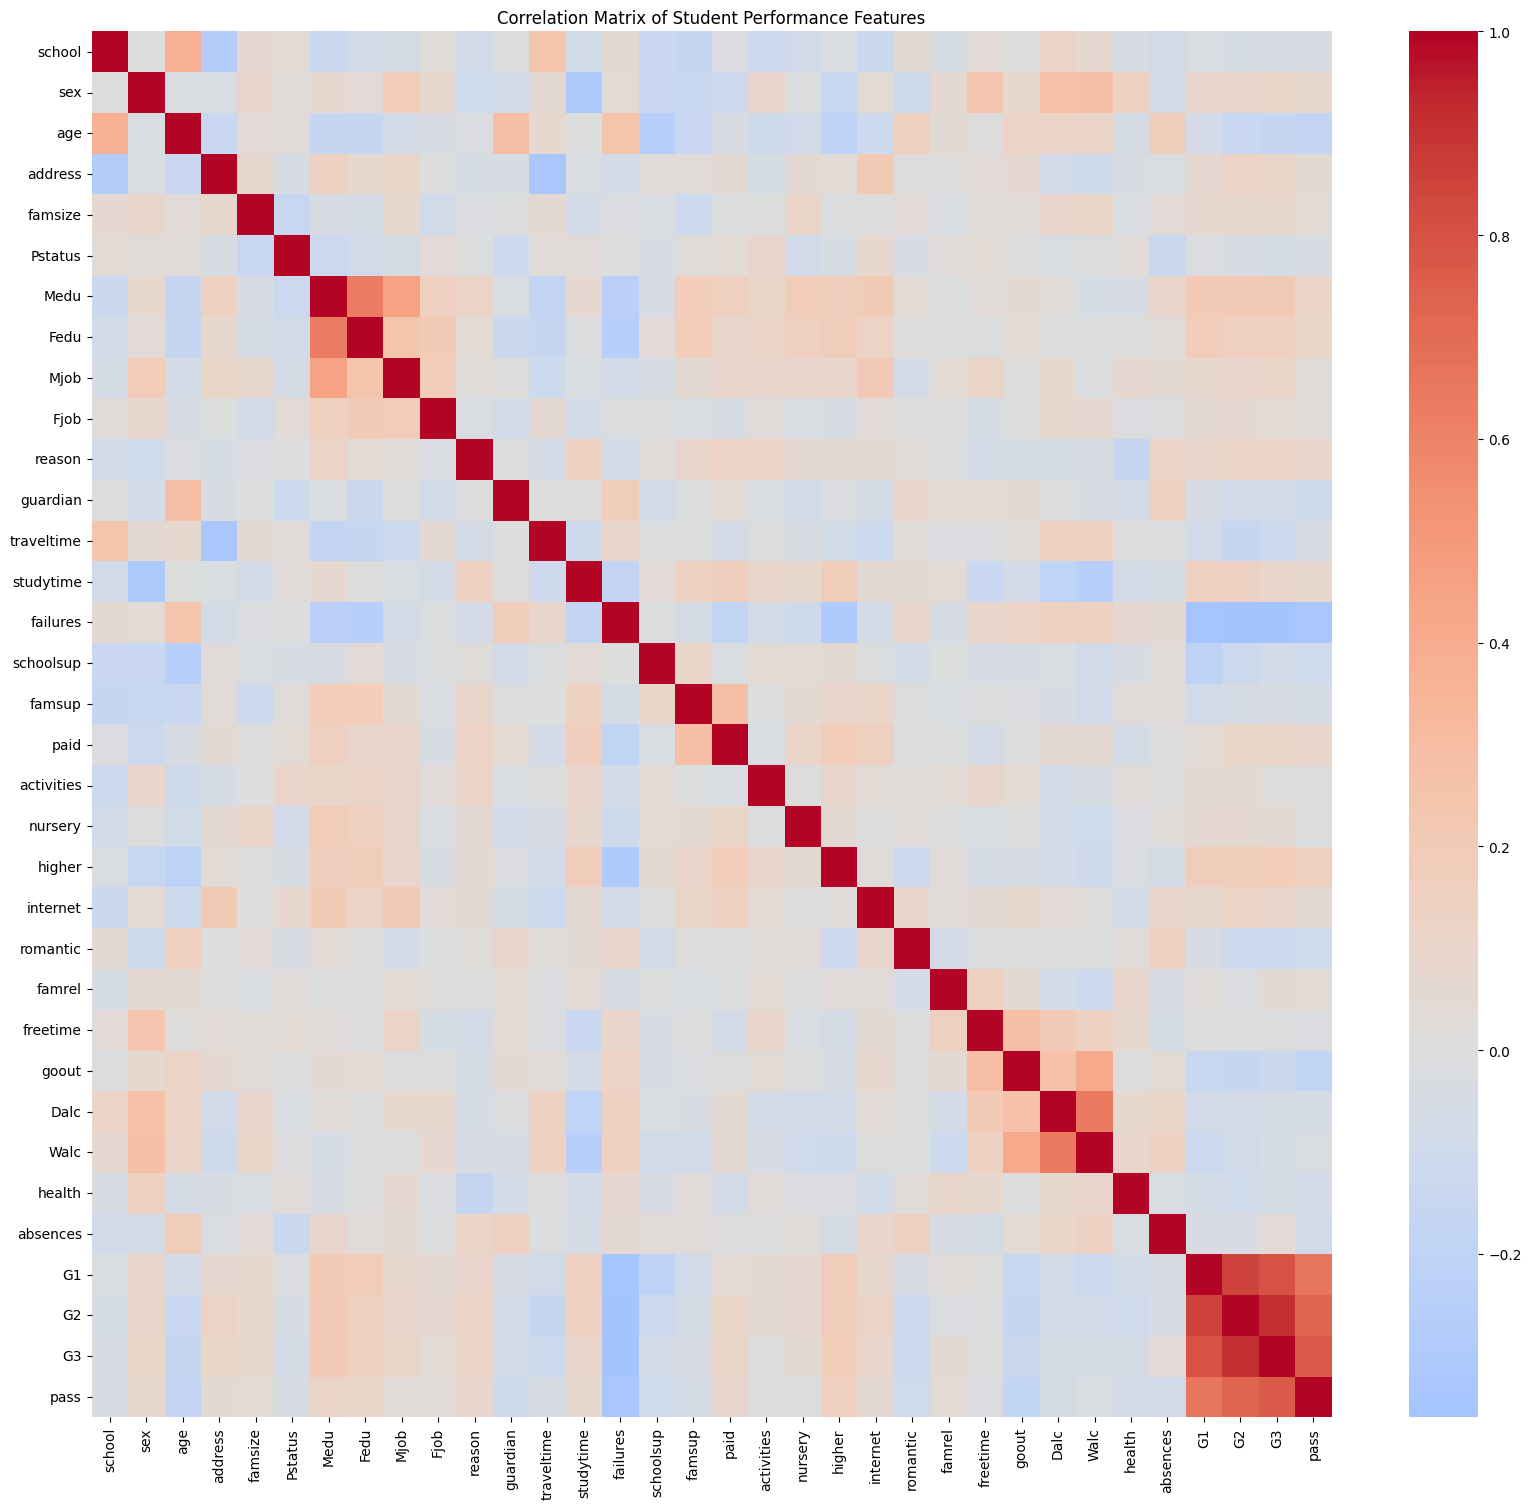

In [14]:
corr_matrix = student_data.corr()
plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=False, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Student Performance Features')
plt.show()

In [15]:
g3_correlations = corr_matrix['G3'].sort_values(ascending=False)
print("Top correlations with final grade (G3):")
print(g3_correlations.head(10))

Top correlations with final grade (G3):
G3         1.000000
G2         0.904868
G1         0.801468
pass       0.770042
Medu       0.217147
higher     0.182465
Fedu       0.152457
reason     0.121994
address    0.105756
sex        0.103456
Name: G3, dtype: float64


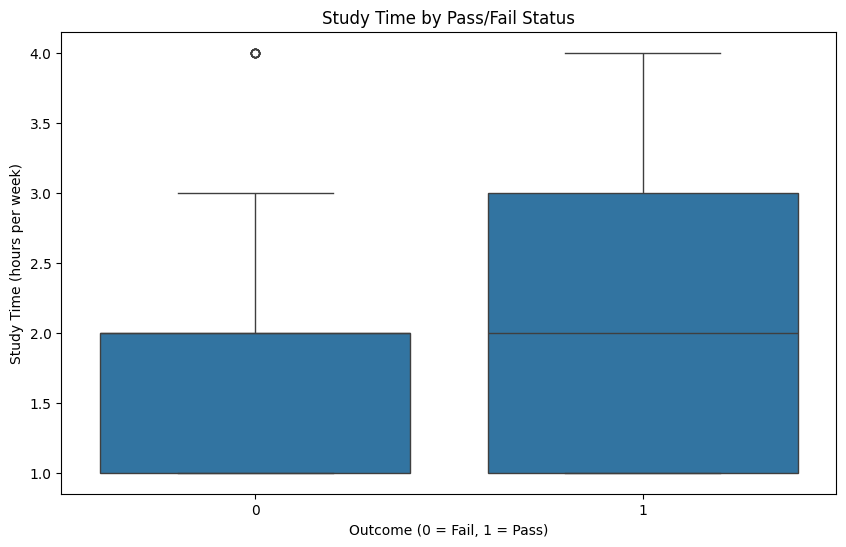

In [16]:
# Compare study time by pass/fail status
plt.figure(figsize=(10, 6))
sns.boxplot(x='pass', y='studytime', data=student_data)
plt.title('Study Time by Pass/Fail Status')
plt.xlabel('Outcome (0 = Fail, 1 = Pass)')
plt.ylabel('Study Time (hours per week)')
plt.show()

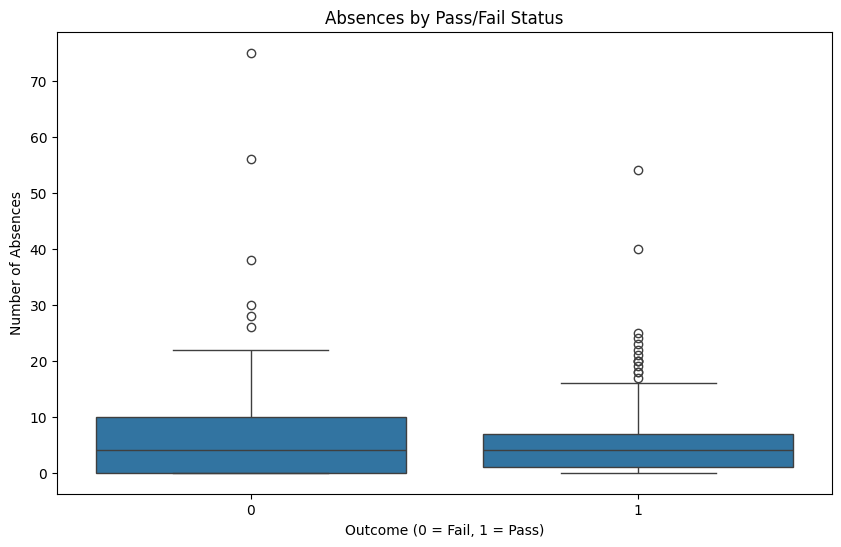

In [17]:
# Compare absences by pass/fail status
plt.figure(figsize=(10, 6))
sns.boxplot(x='pass', y='absences', data=student_data)
plt.title('Absences by Pass/Fail Status')
plt.xlabel('Outcome (0 = Fail, 1 = Pass)')
plt.ylabel('Number of Absences')
plt.show()

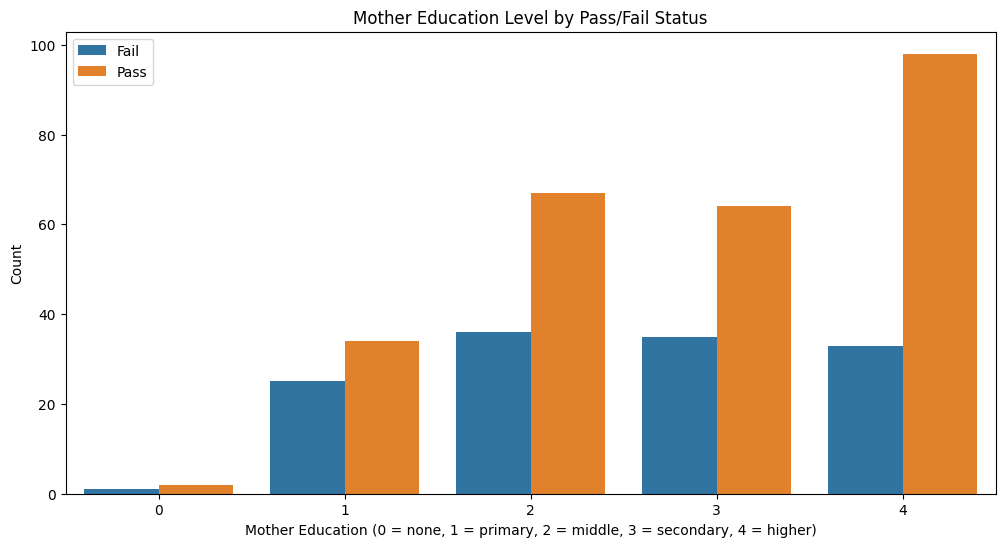

In [18]:
# Compare parental education level by pass/fail status
plt.figure(figsize=(12, 6))
sns.countplot(x='Medu', hue='pass', data=student_data)
plt.title('Mother Education Level by Pass/Fail Status')
plt.xlabel('Mother Education (0 = none, 1 = primary, 2 = middle, 3 = secondary, 4 = higher)')
plt.ylabel('Count')
plt.legend(['Fail', 'Pass'])
plt.show()

---
## 7. Data Preparation for Modeling
Now let's prepare our data for machine learning models.

In [19]:
X_clf = student_data.drop(['G1', 'G2', 'G3', 'pass'], axis=1)
y_clf = student_data['pass']

In [20]:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42)

print(f"Classification - Training set size: {X_train_clf.shape[0]}")
print(f"Classification - Testing set size: {X_test_clf.shape[0]}")

Classification - Training set size: 316
Classification - Testing set size: 79


In [21]:
scaler_clf = StandardScaler()
X_train_clf_scaled = scaler_clf.fit_transform(X_train_clf)
X_test_clf_scaled = scaler_clf.transform(X_test_clf)

---
## 8. Model Training
Let's train machine learning models.

In [22]:
log_reg = LogisticRegression(random_state=42, max_iter=1000)
dec_tree_clf = DecisionTreeClassifier(random_state=42)
rand_forest_clf = RandomForestClassifier(random_state=42, n_estimators=100)

print("Training Classification Models...")
log_reg.fit(X_train_clf_scaled, y_train_clf)
dec_tree_clf.fit(X_train_clf_scaled, y_train_clf)
rand_forest_clf.fit(X_train_clf_scaled, y_train_clf)

print("All models trained successfully!")

Training Classification Models...
All models trained successfully!


---
## 9. Model Evaluation
Now let's evaluate how well our models perform on the test data.

In [23]:
y_pred_log_reg = log_reg.predict(X_test_clf_scaled)
y_pred_dec_tree_clf = dec_tree_clf.predict(X_test_clf_scaled)
y_pred_rand_forest_clf = rand_forest_clf.predict(X_test_clf_scaled)

In [24]:
clf_models = {
    'Logistic Regression': y_pred_log_reg,
    'Decision Tree Classification': y_pred_dec_tree_clf,
    'Random Forest Classification': y_pred_rand_forest_clf
}

results_list = []

for name, pred in clf_models.items():
    accuracy = accuracy_score(y_test_clf, pred)
    precision = precision_score(y_test_clf, pred)
    recall = recall_score(y_test_clf, pred)
    f1 = f1_score(y_test_clf, pred)

    results_list.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

clf_results = pd.DataFrame(results_list)

print("=== CLASSIFICATION MODEL PERFORMANCE ===")
clf_results

=== CLASSIFICATION MODEL PERFORMANCE ===


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.746835,0.758065,0.903846,0.824561
1,Decision Tree Classification,0.708861,0.754386,0.826923,0.788991
2,Random Forest Classification,0.721519,0.720588,0.942308,0.816667


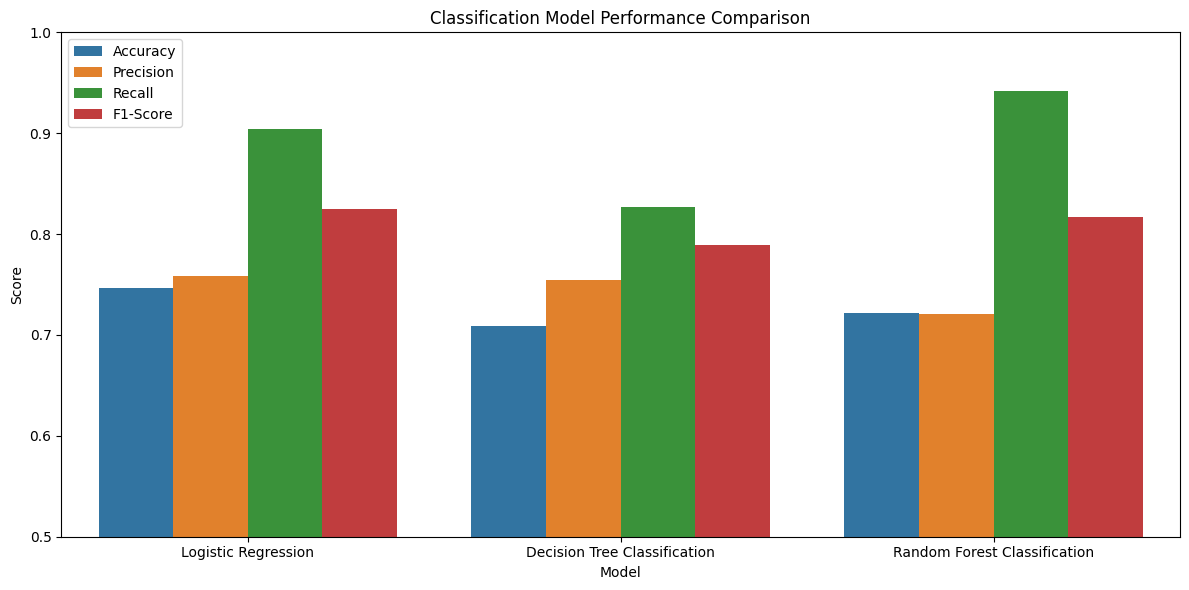

In [25]:
clf_metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
clf_results_long = pd.melt(clf_results, id_vars='Model', value_vars=clf_metrics, 
                           var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=clf_results_long)
plt.title('Classification Model Performance Comparison')
plt.ylim(0.5, 1.0)
plt.legend()
plt.tight_layout()
plt.show()


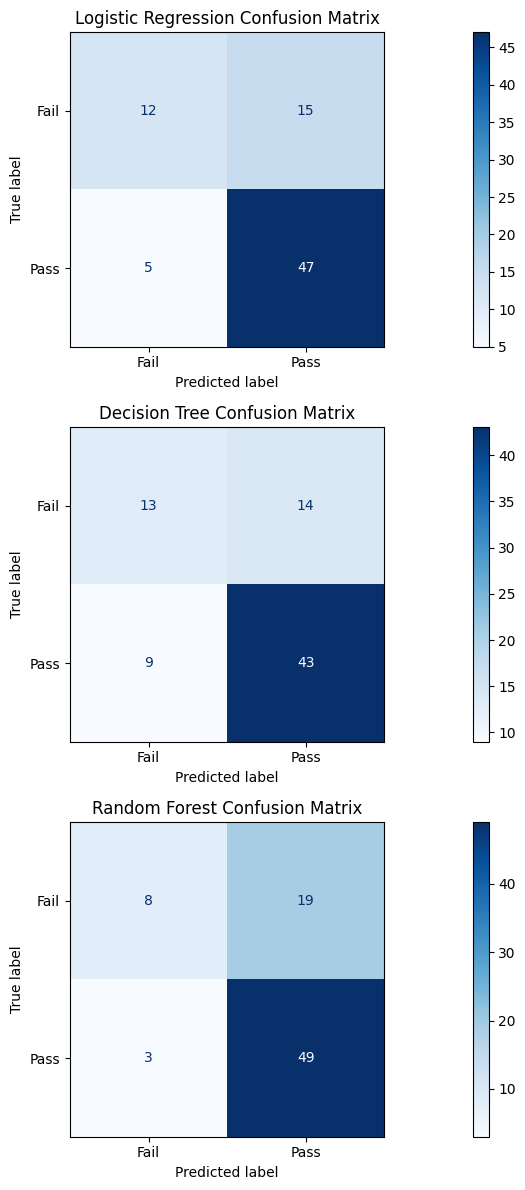

In [26]:
fig, axes = plt.subplots(3, 1, figsize=(18, 12))

clf_models_list = [
    ('Logistic Regression', y_pred_log_reg),
    ('Decision Tree', y_pred_dec_tree_clf),
    ('Random Forest', y_pred_rand_forest_clf)
]

for i, (name, pred) in enumerate(clf_models_list):
    cm = confusion_matrix(y_test_clf, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fail', 'Pass'])
    disp.plot(ax=axes[i], cmap='Blues')
    axes[i].set_title(f'{name} Confusion Matrix')

plt.tight_layout()
plt.show()

## 11. Conclusion and Educational Summary
### What We Learned:
1. **Data Loading and Preparation**: We loaded the UCI Student Performance dataset and prepared it for analysis. 
2. **Exploratory Data Analysis**: We visualized the data to understand relationships between features and student performance.
3. **Model Training**: We trained for classification models:
    - Classification: Logistic Regression, Decision Tree, Random Forest (to predict pass/fail)
 
4. **Model Evaluation**: We compared the performance of our models using various metrics:
    - For classification: Accuracy, Precision, Recall, F1-Score
### Key Findings:
 
 - The Random Forest model performed the best for classification tasks
 - Important features for prediction included previous grades (G1, G2), study time, and absences
 - All classification models achieved above 65% accuracy, meeting our success criteria 
### Important Note:
Remember that this is an educational project. In real educational applications, we would need:
 - More sophisticated feature engineering
 - More advanced models and tuning
 - Consideration of ethical implications
 - Validation with domain experts
 
**Never use this model for actual student assessment or evaluation!**

**GITHUB LINK - https://github.com/ridhiisinghal/student-performance-prediction/**